$\displaystyle  \hat{C}^{\scriptsize\textrm{GMCA}}_{\ell} = \frac{C^{\scriptsize\textrm{GMCA},\textrm{L}_0}_{\ell}}{S} - \langle C^{\tiny\textrm{NOISE}}_{\ell}\rangle$

$\displaystyle S = \langle \frac{C^{\scriptsize\textrm{GMCA},\textrm{L}_i}_{\ell}}{C^{\scriptsize\textrm{prior},\textrm{L}_i}_{\ell}} \rangle$

In [1]:
%matplotlib inline

import os,sys
import numpy as np
import healpy as hp
import pandas as pd
import gmca4im_lib2 as g4i
import astropy.io.fits as fits
import Extension4BINGO as cs
import matplotlib
from   matplotlib import rc
import matplotlib.pyplot as plt
import time
from   IPython.display import clear_output
rc('text', usetex=True)
font = {'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)

In [2]:
#####################################
#paths
#####################################
pathcls   = "/home/marins/Documents/Programmation/BINGO/Component Separation/gmca4im/cls_output" #Path to the cls outputs from NoiseDebiasing2GMCA_building code results
dir_hi    = "21cm"        #Directory name of the cls of the 21cm reconstruction maps
dir_fg    = "foregrounds" #Directory name of the cls of the foregrounds reconstruction maps
dir_prior = "prior"       #Directory name of the cls of the prior maps, that can be (21cm + noise) masked
dir_noise = "noise"       #Directory name of the cls of the noise maps, that can be (WhiteNoise or/and 1/f) masked
dir_pure  = "pure"        #Directory name of the cls of the (only) 21cm maps, masked or not.
#All of cls should be obtained from the same L's (seeds) 
####################################
# seed number 
####################################
seed_used  = 10        #L0 used for analysis, ie, the realisation used for analysis

In [12]:
Cls.keys()

dict_keys(['21cm', 'foregrounds', 'prior', 'noise'])

In [9]:
Cls     = cs.loadcls(pathcls,dirs=[dir_hi,dir_fg,dir_prior,dir_noise,dir_pure])  
Cls_ndb = cs.noisedebiasing(Cls_=Cls)

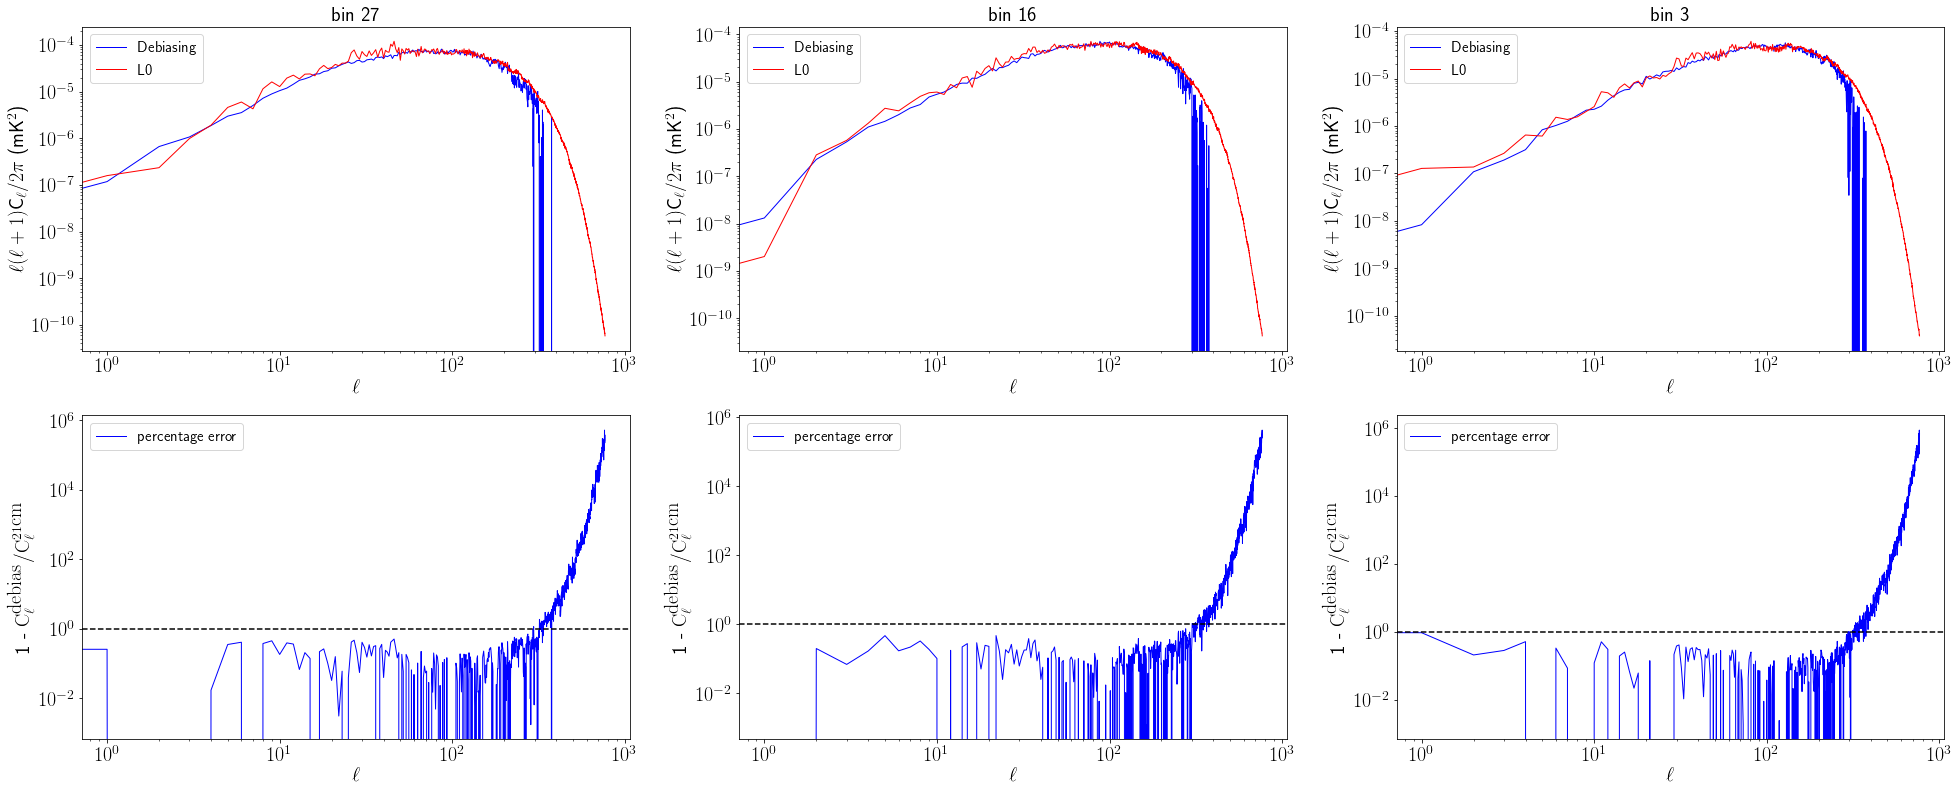

In [43]:
Cls = cs.loadcls(pathcls,dirs=[dir_hi,dir_fg,dir_prior,dir_noise,dir_pure])
fig      = plt.figure()

numplots = 3
grid     = plt.GridSpec(2,2*numplots,top=2.6,right=3*numplots)
nu,nl = Cls_ndb.shape
l     = np.arange(nl)
fact  = l*(l+1)/(2*np.pi)
L0    = "L{}".format(seed_used)
for col,i in enumerate(np.random.randint(nu,size=numplots)):
    ax = plt.subplot(grid[0,col])
    #print("bin: {}".format(i))
    plt.title("bin {}".format(i), fontsize=20)
    plt.plot(l,fact*Cls_ndb[i]          , color="blue", label="Debiasing", linewidth =1)
    plt.plot(l,fact*Cls["pure"][L0][i] , color="red" , label="L0"       , linewidth =1)
    plt.xscale("log")
    plt.yscale("log")
    ax.tick_params(axis='both', which='major', labelsize = 20)
    plt.ylabel(r"$\ell(\ell+1)$C$_{\ell}/2\pi$ (mK$^2$)", fontsize=20)
    plt.xlabel(r"$\ell$", fontsize=20)
    plt.legend(fontsize=15)
    
    ax = plt.subplot(grid[1,col])
    plt.plot(l,(Cls["pure"][L0][i]-Cls_ndb[i])/Cls["pure"][L0][i] , color="blue", label="percentage error", linewidth =1)
    plt.axhline(y=1, linestyle="dashed", color="black")
    plt.xscale("log")
    plt.yscale("log")
    ax.tick_params(axis='both', which='major', labelsize = 20)
    plt.xlabel(r"$\ell$", fontsize=20)
    plt.ylabel(r"1 - $\textrm{C}^{\textrm{debias}}_{\ell}/\textrm{C}^{21\textrm{cm}}_{\ell}$", fontsize=20)
    #plt.xlim(0,300)
    #plt.ylim(1e-6,1e-2)
    plt.legend(fontsize=15);    